# Eksplorasi Dataset

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
import string
from nltk.cluster.util import cosine_distance
from nltk.probability import FreqDist
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory,StopWordRemover, ArrayDictionary
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from textblob import TextBlob

[nltk_data] Downloading package punkt to /home/edo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
fields = ['created_at', 'username', 'name', 'tweet']
df = pd.read_csv('./data/PresidenLanggarKonstitusi.csv', 
                 skipinitialspace=True, usecols=fields, parse_dates=['created_at'])
df

,created_at,username,name,tweet
0,2021-06-12 18:47:40,ulamaaswaja,Pecinta Ulama Aswaja,Rezim ini suka kali malaki dan mempersulit rak...
1,2021-06-12 18:46:42,gotham_cty0,Gotham,@Hail_Indonesia @7thbali @B_dzoel @Wanitadesap...
2,2021-06-12 18:45:59,gotham_cty0,Gotham,@B_dzoel @Hail_Indonesia @7thbali @Wanitadesap...
3,2021-06-12 18:45:57,lollynadh,Ecky,Miris ga liat keadaan negeri kita... Miris gaa...
4,2021-06-12 18:45:23,melati152,Melati15,@Adinda_Zahran1 @zombiebrazil Halooo... DPR ma...
...,...,...,...,...
2254,2017-02-13 00:09:41,heriboedi,#MitraHansip,Sejarah mencatat di Indonesia ada #GubernurTer...
2255,2017-02-13 00:07:18,heriboedi,#MitraHansip,"#MemilihPemimpin jgn yg terdakwa, apalagi dia ..."
2256,2017-02-12 19:27:05,blessvon16,Sa Metaru Desh,@maspiyuuu #PresidenLanggarKonstitusi
2257,2017-02-12 12:07:32,hananyusron,#BeasiswaNTBKeSudan,@RamliRizal @romliatma @ZUL_Hasan @budimandjat...


In [3]:
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'

def tweet_cleaner(text):
    mention = re.findall("@([a-zA-Z0-9_]{1,15})", text)
    stripped = re.sub(combined_pat, '', text)
    stripped = re.sub(www_pat, '', stripped)
    stripped = re.sub('^b[\'"](RT)? ?:?|x[0123456789abcdef]+', '', stripped)
    lower_case = stripped.lower()
    lower_case = lower_case.strip()
    lower_case = lower_case.replace('\\n', ' ')
    lower_case = lower_case.replace('\\', '')

    return lower_case, mention

In [4]:
clean_tweets = []
tweet_mention = []
mention_sum = []
for i in range(0, len(df)):
    text, mention = tweet_cleaner(df['tweet'][i])
    clean_tweets.append(text)
    tweet_mention.append(mention)
    mention_sum.append(len(mention))

df['tweet'] = clean_tweets
# df['mentions'] = tweet_mention
df['mentions_sum'] = mention_sum
df.head()

,created_at,username,name,tweet,mentions_sum
0,2021-06-12 18:47:40,ulamaaswaja,Pecinta Ulama Aswaja,rezim ini suka kali malaki dan mempersulit rak...,0
1,2021-06-12 18:46:42,gotham_cty0,Gotham,😭😭😭😭 ingat banggg#presidenlanggarkonstitusi #p...,14
2,2021-06-12 18:45:59,gotham_cty0,Gotham,passtii #presidenlanggarkonstitusi #presidenla...,14
3,2021-06-12 18:45:57,lollynadh,Ecky,miris ga liat keadaan negeri kita... miris gaa...,0
4,2021-06-12 18:45:23,melati152,Melati15,halooo... dpr masih kaaan... lihat tuuh 👇 #pre...,2


In [5]:
username_group = df.groupby('username').groups
print('Jumlah akun yang didapat ',len(username_group))
username_group

Jumlah akun yang didapat  457


{'01farindo': [270], '1001titisan': [185], '1febri': [407, 408, 410], '1ni_embun__': [1023], '212jalurgaza': [197], '2_bongkar': [1063, 1197], '555akhmad': [550, 592, 599, 708, 1053, 1142, 1872, 1874, 2176, 2181, 2188, 2194], '5h0n4': [2081], '60dy1o710n': [1960, 1967, 1968, 1971, 1972, 1976], '73n0n9': [1668, 1675, 1676, 1683, 1692, 1694, 1695, 1746, 1750, 1753, 1758, 1760, 1763, 1765, 1769], '7thbali': [104, 109, 112, 117, 118, 794, 805, 812, 818, 824, 827, 830, 833, 836, 838, 991, 992, 1001, 1007, 1008, 1017, 1026, 1034, 1906, 1925, 2109, 2147, 2151, 2175, 2178], '9lentertainment': [622], '__kangmasmo3__': [909], '_adityudhistira': [15], '_bellapeter': [1316, 1321, 1395, 1465], '_srikandigalau_': [220], '_tan_mudo_': [1816, 1857, 1869], 'a7i2s': [140, 145, 147], 'a_syahrulkhair': [175], 'abahnasaf3': [2103, 2115, 2125, 2225, 2229], 'abdulla3new': [588], 'abureal2': [1458], 'abuyumn63495544': [48], 'aceljuju': [515], 'achmadafdhal': [994], 'acp_tukang': [371, 376], 'adecand00351122':

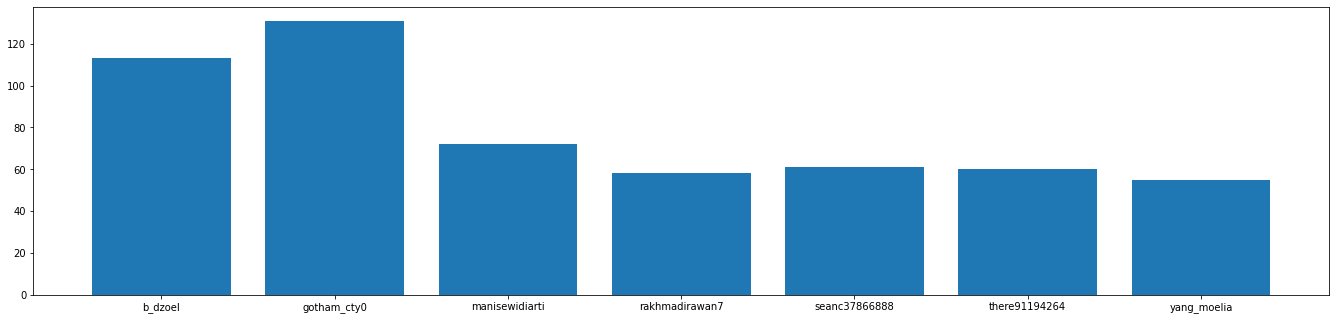

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])

username = []
total_tweets = []

for key,value in username_group.items():
    if len(value)>50:
        username.append(key)
        total_tweets.append(len(value))
        
    
ax.bar(username,total_tweets)
plt.show()

{1: 283, 2: 53, 3: 30, 4: 9, 5: 9, 6: 6, 7: 11, 8: 6, 9: 5, 10: 3, 11: 4, 12: 2, 14: 2, 15: 1, 16: 2, 17: 1, 18: 2, 20: 2, 21: 1, 26: 1, 28: 1, 29: 1, 30: 3, 32: 2, 36: 2, 38: 1, 41: 2, 42: 1, 43: 1, 47: 2, 48: 1, 55: 1, 58: 1, 60: 1, 61: 1, 72: 1, 113: 1, 131: 1}


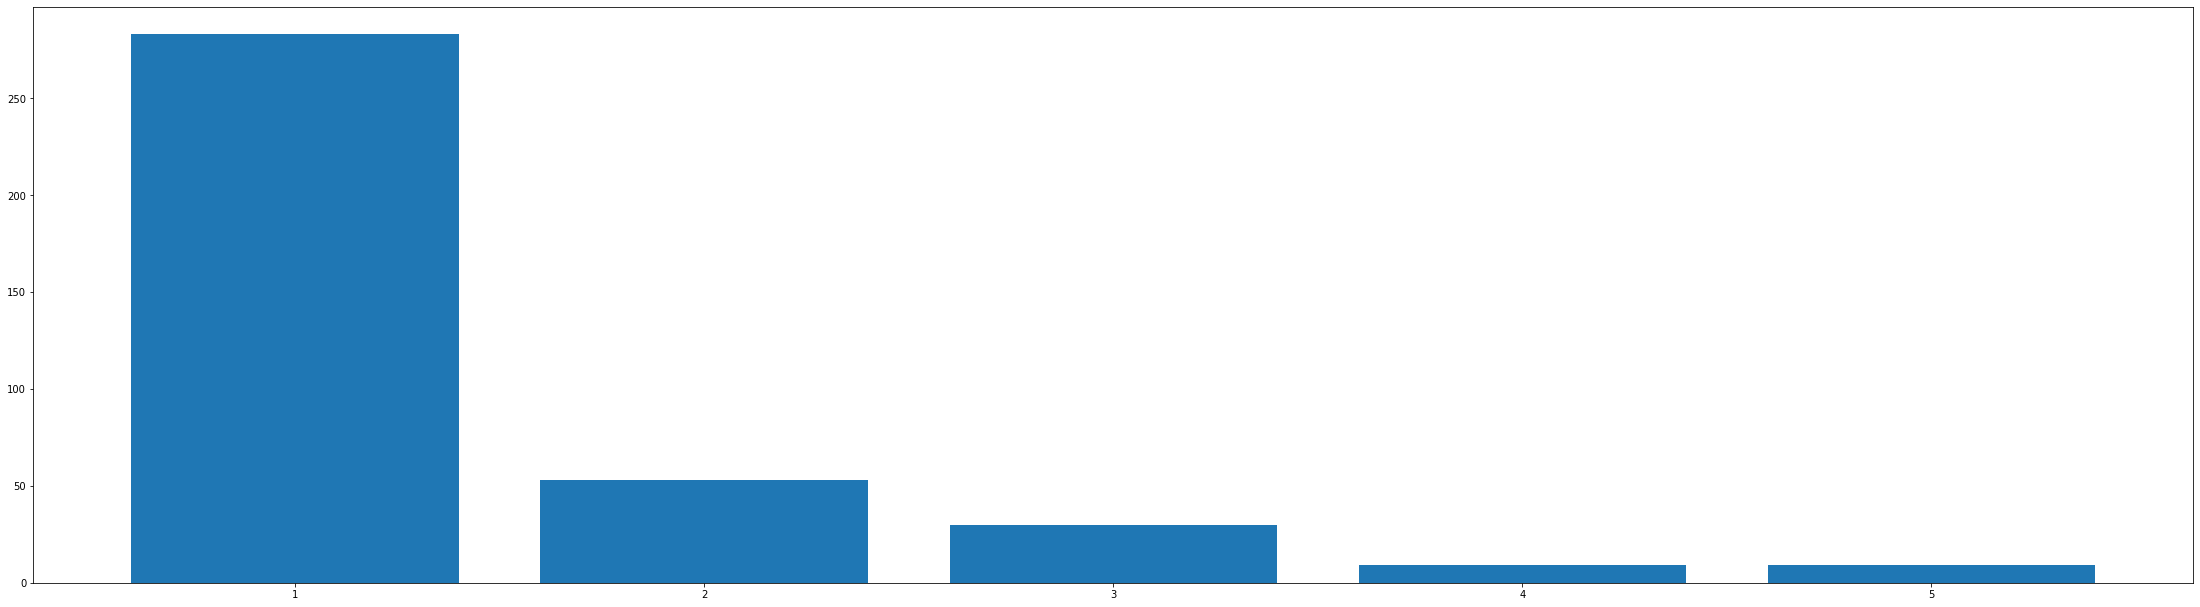

In [7]:
length_dict = {key: len(value) for key, value in username_group.items()}
user_by_tweets = Counter(length_dict.values())

user_by_tweets = sorted(user_by_tweets.items())
user_by_tweets = dict((key, value) for key, value in user_by_tweets)
print(user_by_tweets)

user_by_tweets = dict(itertools.islice(user_by_tweets.items(), 5))

fig = plt.figure()
ax = fig.add_axes([0,0,5,2])
plt.bar(range(len(user_by_tweets)), list(user_by_tweets.values()), align='center')
plt.xticks(range(len(user_by_tweets)), list(user_by_tweets.keys()))
plt.show()

In [8]:
df

,created_at,username,name,tweet,mentions_sum
0,2021-06-12 18:47:40,ulamaaswaja,Pecinta Ulama Aswaja,rezim ini suka kali malaki dan mempersulit rak...,0
1,2021-06-12 18:46:42,gotham_cty0,Gotham,😭😭😭😭 ingat banggg#presidenlanggarkonstitusi #p...,14
2,2021-06-12 18:45:59,gotham_cty0,Gotham,passtii #presidenlanggarkonstitusi #presidenla...,14
3,2021-06-12 18:45:57,lollynadh,Ecky,miris ga liat keadaan negeri kita... miris gaa...,0
4,2021-06-12 18:45:23,melati152,Melati15,halooo... dpr masih kaaan... lihat tuuh 👇 #pre...,2
...,...,...,...,...,...
2254,2017-02-13 00:09:41,heriboedi,#MitraHansip,sejarah mencatat di indonesia ada #gubernurter...,0
2255,2017-02-13 00:07:18,heriboedi,#MitraHansip,"#memilihpemimpin jgn yg terdakwa, apalagi dia ...",0
2256,2017-02-12 19:27:05,blessvon16,Sa Metaru Desh,#presidenlanggarkonstitusi,1
2257,2017-02-12 12:07:32,hananyusron,#BeasiswaNTBKeSudan,#presidenlanggarkonstitusi #presidenlanggarko...,6


# Preprocessing

## Mentioned Account by User

In [9]:
mentionDf = df.groupby(by=['username'])['mentions_sum'].sum()
mentionDf

username
01farindo          0
1001titisan        0
1febri             0
1ni_embun__       14
212jalurgaza       0
                  ..
yuliereborn        1
yusli53117720      3
zarnaout45         1
zulham04007888     0
zulhamkenzo        2
Name: mentions_sum, Length: 457, dtype: int64

## Word Tokenizing

In [10]:
tweet_dict = {}
freqWordList = []

stopwordFactory = StopWordRemoverFactory().get_stop_words()
addedStopword = ['yg', 'nyang', 'apa', 'nya']
stopword = stopwordFactory + addedStopword
stopwordDict = ArrayDictionary(stopword)
remover = StopWordRemover(stopwordDict)

for username in username_group:
    tweet_list = []
    for i in username_group[username]:
        tweet = ""
        row = df.iloc[i]
        if row['created_at'] is not None and row['tweet'] is not None:
            tweet = row['tweet']
            
            tweet = tweet.translate(str.maketrans("","",string.punctuation)).strip()
            tweet = remover.remove(tweet)
            tweet = nltk.tokenize.word_tokenize(tweet)
            
            freqWord = nltk.FreqDist(tweet)
            freqWordList.append(freqWord.most_common())
            
            tweet_list.append(tweet)
            
        tweet_dict[username] = tweet_list

for i in tweet_dict:
    print(i,'=>',tweet_dict[i])

01farindo => [['kalian', 'sejahtera', 'kan', 'fasilitas', 'tunjangan', 'begitu', 'wow', 'kenapa', 'kinerja', 'kalian', 'mencekik', 'rakyat', 'masih', 'kurang', 'uang', 'kami', 'sudah', 'kalian', 'maling', 'masih', 'kurang', 'presidenlanggarkonstitusi']]
1001titisan => [['jangan', 'lupakan', 'km50', 'presidenlanggarkonstitusi', 'presidenlanggarkonstitusi']]
1febri => [['presidenlanggarkonstitusi'], ['nah', 'lbh', 'tepat', 'presidenlanggarkonstitusi'], ['presidenlanggarkonstitusi']]
1ni_embun__ => [['jikalau', 'presidenlanggarkonstitusi', 'presidenlanggarkonstitusi', 'rakyat', 'akan', 'sengsara']]
212jalurgaza => [['menunggu', 'suara', 'dpr', 'presidenlanggarkonstitusi']]
2_bongkar => [['rakyat', 'tak', 'berkutik', 'mahasiswanya', 'tidur', 'presidenlanggarkonstitusi', 'presidenlanggarkonstitusi'], ['ampuuuuun', 'ampuuunnn', 'presidenlanggarkonstitusi']]
555akhmad => [['presidenlanggarkonstitusi', 'presidenlanggarkonstitusi', 'rejim', 'pembenci', 'ulama'], ['presidenlanggarkonstitusi', 'p

In [11]:
totalFreqWord = {}

for users in freqWordList:
    for word in users:
        if word[0] in totalFreqWord.keys():
            totalFreqWord[word[0]] = totalFreqWord[word[0]] + word[1]
        else:
            totalFreqWord[word[0]] = word[1]

totalFreqWord = dict(sorted(totalFreqWord.items(), key=lambda item: item[1], reverse=True))
totalFreqWord

{'presidenlanggarkonstitusi': 3995,
 'rakyat': 145,
 'kaya': 142,
 'mingkin': 124,
 'negara': 96,
 'hukum': 85,
 'mahasiswamatisuri': 83,
 'miskin': 74,
 'bukan': 69,
 'presiden': 68,
 'merajalela': 62,
 'partai': 59,
 'aja': 55,
 'indonesia': 55,
 'rezim': 55,
 'jangan': 53,
 'negeri': 51,
 '2': 50,
 'pajak': 49,
 'bismillah': 49,
 'konstitusi': 49,
 'up': 48,
 'jokowi': 48,
 'korupsi': 47,
 'orang': 45,
 'semua': 45,
 'yg': 43,
 'di': 43,
 'gak': 42,
 'melanggar': 41,
 'jadi': 41,
 'kejutanpledoihrs': 41,
 'kalau': 40,
 'tagar': 39,
 'mau': 39,
 'salah': 38,
 'pemerintah': 36,
 'utang': 36,
 '1': 35,
 'tak': 34,
 '6': 34,
 'haji': 34,
 'lebih': 33,
 'sama': 32,
 'dana': 32,
 'mana': 32,
 'siapa': 32,
 'dg': 31,
 'mundur': 31,
 'tegas‼️': 31,
 'tegakkan': 31,
 'berlaku‼️': 31,
 'takbir‼️': 31,
 '3': 31,
 'kan': 30,
 'maling': 30,
 'amp': 30,
 'd': 30,
 'mati': 29,
 'bener': 29,
 'bikin': 29,
 'utk': 29,
 'allah': 29,
 'kok': 28,
 'pak': 28,
 'g': 28,
 'kg': 28,
 'kpk': 28,
 'sendiri':

## Sentence Similarity

In [12]:
def sentence_similarity(sent1, sent2, stopwords=None):
    """
    calculate the similarity between sentence!
    return distance between sentences
    """

    all_words = list(set(sent1 + sent2))
 
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
 
    # build the vector for the first sentence
    for w in sent1:
        vector1[all_words.index(w)] += 1
 
    # build the vector for the second sentence
    for w in sent2:
        vector2[all_words.index(w)] += 1
 
    return 1 - cosine_distance(vector1, vector2)

def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

In [13]:
user_olahan_dict = {}

for key in tweet_dict:
    user_features_dict = {}
    user_tweets_similarity_mean = 0
    for i in tweet_dict[key]:
        similarity = 0
        for j in tweet_dict[key]:
            similarity += sentence_similarity(i,j)
#             similarity += jaccard_similarity(i,j)
        similarity = similarity / len(tweet_dict[key])
        user_tweets_similarity_mean += similarity
    user_tweets_similarity_mean = user_tweets_similarity_mean/len(tweet_dict[key])
    user_features_dict['username'] = key
    user_features_dict['tweets_mean'] = user_tweets_similarity_mean
    user_features_dict['frequency'] = len(tweet_dict[key])
    user_features_dict['mentioned'] = mentionDf[key]
    user_olahan_dict[key] = user_features_dict

user_olahan_dict

{'01farindo': {'username': '01farindo',
  'tweets_mean': 0.9999999999999998,
  'frequency': 1,
  'mentioned': 0},
 '1001titisan': {'username': '1001titisan',
  'tweets_mean': 0.9999999999999999,
  'frequency': 1,
  'mentioned': 0},
 '1febri': {'username': '1febri',
  'tweets_mean': 0.7777777777777778,
  'frequency': 3,
  'mentioned': 0},
 '1ni_embun__': {'username': '1ni_embun__',
  'tweets_mean': 0.9999999999999998,
  'frequency': 1,
  'mentioned': 14},
 '212jalurgaza': {'username': '212jalurgaza',
  'tweets_mean': 1.0,
  'frequency': 1,
  'mentioned': 0},
 '2_bongkar': {'username': '2_bongkar',
  'tweets_mean': 0.6924500897298753,
  'frequency': 2,
  'mentioned': 7},
 '555akhmad': {'username': '555akhmad',
  'tweets_mean': 0.3823040173961871,
  'frequency': 12,
  'mentioned': 139},
 '5h0n4': {'username': '5h0n4',
  'tweets_mean': 1.0,
  'frequency': 1,
  'mentioned': 0},
 '60dy1o710n': {'username': '60dy1o710n',
  'tweets_mean': 0.3761744530555098,
  'frequency': 6,
  'mentioned': 14

## TFIDF Vectorizer
#### Code not Implemented yet

In [14]:
raw_list = []
for key in user_olahan_dict:
    data = []
    row = user_olahan_dict[key]
    data.append(row['username'])
    data.append(row['frequency'])
    data.append(row['tweets_mean'])
    data.append(row['mentioned'])
    raw_list.append(data)

raw_list

[['01farindo', 1, 0.9999999999999998, 0],
 ['1001titisan', 1, 0.9999999999999999, 0],
 ['1febri', 3, 0.7777777777777778, 0],
 ['1ni_embun__', 1, 0.9999999999999998, 14],
 ['212jalurgaza', 1, 1.0, 0],
 ['2_bongkar', 2, 0.6924500897298753, 7],
 ['555akhmad', 12, 0.3823040173961871, 139],
 ['5h0n4', 1, 1.0, 0],
 ['60dy1o710n', 6, 0.3761744530555098, 140],
 ['73n0n9', 15, 0.5798375707121088, 77],
 ['7thbali', 30, 0.37370393017984627, 388],
 ['9lentertainment', 1, 1.0, 0],
 ['__kangmasmo3__', 1, 0.9999999999999998, 9],
 ['_adityudhistira', 1, 1.0, 0],
 ['_bellapeter', 4, 0.6643908173610358, 24],
 ['_srikandigalau_', 1, 0.9999999999999998, 1],
 ['_tan_mudo_', 3, 0.4497494822673465, 0],
 ['a7i2s', 3, 0.5613929334482036, 52],
 ['a_syahrulkhair', 1, 1.0000000000000002, 0],
 ['abahnasaf3', 5, 0.4234083210548324, 0],
 ['abdulla3new', 1, 1.0000000000000002, 1],
 ['abureal2', 1, 1.0, 0],
 ['abuyumn63495544', 1, 0.9999999999999998, 0],
 ['aceljuju', 1, 1.0, 0],
 ['achmadafdhal', 1, 0.999999999999999

In [15]:
raw_df = pd.DataFrame(raw_list,columns=['username', 'frequency', 'tweets_mean', 'mentioned'])
raw_df = raw_df.dropna()
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 456
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   username     457 non-null    object 
 1   frequency    457 non-null    int64  
 2   tweets_mean  457 non-null    float64
 3   mentioned    457 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 17.9+ KB


In [16]:
df_without_username = raw_df.drop(["username"], axis = 1)

df_without_username

,frequency,tweets_mean,mentioned
0,1,1.000000,0
1,1,1.000000,0
2,3,0.777778,0
3,1,1.000000,14
4,1,1.000000,0
...,...,...,...
452,1,1.000000,1
453,2,0.731125,3
454,1,1.000000,1
455,1,1.000000,0


In [17]:
df_username = raw_df.drop(["frequency", "tweets_mean", 'mentioned'], axis = 1)

df_username

,username
0,01farindo
1,1001titisan
2,1febri
3,1ni_embun__
4,212jalurgaza
...,...
452,yuliereborn
453,yusli53117720
454,zarnaout45
455,zulham04007888


## Clustering

In [18]:
x_array = np.array(df_without_username)
print(x_array)

[[1.         1.         0.        ]
 [1.         1.         0.        ]
 [3.         0.77777778 0.        ]
 ...
 [1.         1.         1.        ]
 [1.         1.         0.        ]
 [1.         1.         2.        ]]


In [19]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[-0.31975339,  0.63443417, -0.22625615],
       [-0.31975339,  0.63443417, -0.22625615],
       [-0.15756993, -0.37962183, -0.22625615],
       ...,
       [-0.31975339,  0.63443417, -0.22032697],
       [-0.31975339,  0.63443417, -0.22625615],
       [-0.31975339,  0.63443417, -0.21439778]])

In [20]:
model = KMeans(n_clusters = 2, random_state=100)
# model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(x_scaled)
# print(model.cluster_centers_)

KMeans(n_clusters=2, random_state=100)

In [21]:
df_without_username['class'] = model.labels_
df_without_username

,frequency,tweets_mean,mentioned,class
0,1,1.000000,0,1
1,1,1.000000,0,1
2,3,0.777778,0,1
3,1,1.000000,14,1
4,1,1.000000,0,1
...,...,...,...,...
452,1,1.000000,1,1
453,2,0.731125,3,1
454,1,1.000000,1,1
455,1,1.000000,0,1


In [22]:
df_username["tweets"] = df_without_username["frequency"]
df_username["similarity"] = df_without_username["tweets_mean"]
df_username["mentioned"] = df_without_username["mentioned"]
df_username["class"] = df_without_username["class"]

df_username

,username,tweets,similarity,mentioned,class
0,01farindo,1,1.000000,0,1
1,1001titisan,1,1.000000,0,1
2,1febri,3,0.777778,0,1
3,1ni_embun__,1,1.000000,14,1
4,212jalurgaza,1,1.000000,0,1
...,...,...,...,...,...
452,yuliereborn,1,1.000000,1,1
453,yusli53117720,2,0.731125,3,1
454,zarnaout45,1,1.000000,1,1
455,zulham04007888,1,1.000000,0,1


## Sentiment Anlysis

In [23]:
buzzerDf = df_username[df_username['class'] == 0].copy()
buzzerDf

,username,tweets,similarity,mentioned,class
10,7thbali,30,0.373704,388,0
52,angelqueen_99,32,0.899692,549,0
67,arthan38836243,30,0.526037,490,0
82,b_dzoel,113,0.414208,575,0
116,dancersejati1,41,0.203970,1,0
143,elang4343,43,0.394768,1439,0
148,enggarhadii,29,0.119171,4,0
184,gotham_cty0,131,0.412156,749,0
187,hail_indonesia,38,0.362692,433,0
223,iteungtea5,47,0.567363,865,0


In [24]:
nonbuzzerDf = df_username[df_username['class'] == 1]
nonbuzzerDf

,username,tweets,similarity,mentioned,class
0,01farindo,1,1.000000,0,1
1,1001titisan,1,1.000000,0,1
2,1febri,3,0.777778,0,1
3,1ni_embun__,1,1.000000,14,1
4,212jalurgaza,1,1.000000,0,1
...,...,...,...,...,...
452,yuliereborn,1,1.000000,1,1
453,yusli53117720,2,0.731125,3,1
454,zarnaout45,1,1.000000,1,1
455,zulham04007888,1,1.000000,0,1


In [25]:
buzzer_uname = list(buzzerDf['username'])
sentimentDf = df[df['username'].isin(buzzer_uname)].copy()
sentimentDf

,created_at,username,name,tweet,mentions_sum
1,2021-06-12 18:46:42,gotham_cty0,Gotham,😭😭😭😭 ingat banggg#presidenlanggarkonstitusi #p...,14
2,2021-06-12 18:45:59,gotham_cty0,Gotham,passtii #presidenlanggarkonstitusi #presidenla...,14
5,2021-06-12 18:45:19,gotham_cty0,Gotham,eling kebijakane ama orange #presidenlanggarko...,14
7,2021-06-12 18:44:16,korban_rezim,🇮🇩🇮🇩🇮🇩Korban_Rezim🇮🇩🇮🇩🇮🇩,akan tiba waktunya !!✊ suara protes segala la...,0
8,2021-06-12 18:44:11,gotham_cty0,Gotham,tagar siapa... #presidenlanggarkonstitusi #pre...,14
...,...,...,...,...,...
2230,2021-06-03 14:27:23,b_dzoel,Bang_Dzoel,ontong pada diem bae !! pelaturan sebuah nega...,0
2233,2021-06-03 14:23:38,b_dzoel,Bang_Dzoel,"diah nyang bikin platuran, diah ama familinyah...",0
2238,2021-06-03 14:20:41,b_dzoel,Bang_Dzoel,assalamualaikum bismillah penghuni alam ghai...,0
2239,2021-06-03 14:19:09,b_dzoel,Bang_Dzoel,assalamualaikum bismillah penghuni alam ghai...,0


In [26]:
cleanPunct = []
for i, row in sentimentDf.iterrows():
    text = row['tweet']
    text = text.replace("#", " ").replace("_", " ")
    cleanPunct.append(text)
    
sentimentDf['tweet'] = cleanPunct
sentimentDf

,created_at,username,name,tweet,mentions_sum
1,2021-06-12 18:46:42,gotham_cty0,Gotham,😭😭😭😭 ingat banggg presidenlanggarkonstitusi p...,14
2,2021-06-12 18:45:59,gotham_cty0,Gotham,passtii presidenlanggarkonstitusi presidenla...,14
5,2021-06-12 18:45:19,gotham_cty0,Gotham,eling kebijakane ama orange presidenlanggarko...,14
7,2021-06-12 18:44:16,korban_rezim,🇮🇩🇮🇩🇮🇩Korban_Rezim🇮🇩🇮🇩🇮🇩,akan tiba waktunya !!✊ suara protes segala la...,0
8,2021-06-12 18:44:11,gotham_cty0,Gotham,tagar siapa... presidenlanggarkonstitusi pre...,14
...,...,...,...,...,...
2230,2021-06-03 14:27:23,b_dzoel,Bang_Dzoel,ontong pada diem bae !! pelaturan sebuah nega...,0
2233,2021-06-03 14:23:38,b_dzoel,Bang_Dzoel,"diah nyang bikin platuran, diah ama familinyah...",0
2238,2021-06-03 14:20:41,b_dzoel,Bang_Dzoel,assalamualaikum bismillah penghuni alam ghai...,0
2239,2021-06-03 14:19:09,b_dzoel,Bang_Dzoel,assalamualaikum bismillah penghuni alam ghai...,0


In [27]:
def get_tweet_sentiment(tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(tweet)
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        else:
            return 'negative'

In [28]:
sentimentLabel = []
for i, row in sentimentDf.iterrows():
    sentiment = get_tweet_sentiment(row['tweet'])
    sentimentLabel.append(sentiment)
    
sentimentDf['sentiment'] = sentimentLabel

In [29]:
sentimentDf

,created_at,username,name,tweet,mentions_sum,sentiment
1,2021-06-12 18:46:42,gotham_cty0,Gotham,😭😭😭😭 ingat banggg presidenlanggarkonstitusi p...,14,negative
2,2021-06-12 18:45:59,gotham_cty0,Gotham,passtii presidenlanggarkonstitusi presidenla...,14,negative
5,2021-06-12 18:45:19,gotham_cty0,Gotham,eling kebijakane ama orange presidenlanggarko...,14,negative
7,2021-06-12 18:44:16,korban_rezim,🇮🇩🇮🇩🇮🇩Korban_Rezim🇮🇩🇮🇩🇮🇩,akan tiba waktunya !!✊ suara protes segala la...,0,negative
8,2021-06-12 18:44:11,gotham_cty0,Gotham,tagar siapa... presidenlanggarkonstitusi pre...,14,negative
...,...,...,...,...,...,...
2230,2021-06-03 14:27:23,b_dzoel,Bang_Dzoel,ontong pada diem bae !! pelaturan sebuah nega...,0,negative
2233,2021-06-03 14:23:38,b_dzoel,Bang_Dzoel,"diah nyang bikin platuran, diah ama familinyah...",0,negative
2238,2021-06-03 14:20:41,b_dzoel,Bang_Dzoel,assalamualaikum bismillah penghuni alam ghai...,0,negative
2239,2021-06-03 14:19:09,b_dzoel,Bang_Dzoel,assalamualaikum bismillah penghuni alam ghai...,0,negative


In [30]:
resDict = {}
for i, row in sentimentDf.iterrows():
    if row['username'] not in resDict.keys():
        resDict[row['username']] = list()
    resDict[row['username']].append(row['sentiment'])
resDict

{'gotham_cty0': ['negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'negative',
  'ne

In [31]:
classBuzzer = []
for i, row in buzzerDf.iterrows():
    mode = max(set(resDict[row['username']]), key = resDict[row['username']].count)
    classBuzzer.append(mode)
    
buzzerDf['class'] = classBuzzer
buzzerDf

,username,tweets,similarity,mentioned,class
10,7thbali,30,0.373704,388,negative
52,angelqueen_99,32,0.899692,549,negative
67,arthan38836243,30,0.526037,490,negative
82,b_dzoel,113,0.414208,575,negative
116,dancersejati1,41,0.203970,1,negative
143,elang4343,43,0.394768,1439,negative
148,enggarhadii,29,0.119171,4,negative
184,gotham_cty0,131,0.412156,749,negative
187,hail_indonesia,38,0.362692,433,negative
223,iteungtea5,47,0.567363,865,negative


In [32]:
res_Cos_KM_Df = pd.concat([buzzerDf, nonbuzzerDf])
res_Cos_KM_Df.to_csv('./data/Result_Cos_KM.csv')
res_Cos_KM_Df

,username,tweets,similarity,mentioned,class
10,7thbali,30,0.373704,388,negative
52,angelqueen_99,32,0.899692,549,negative
67,arthan38836243,30,0.526037,490,negative
82,b_dzoel,113,0.414208,575,negative
116,dancersejati1,41,0.203970,1,negative
...,...,...,...,...,...
452,yuliereborn,1,1.000000,1,1
453,yusli53117720,2,0.731125,3,1
454,zarnaout45,1,1.000000,1,1
455,zulham04007888,1,1.000000,0,1


In [ ]:
res_Jac_KM_Df = pd.concat([buzzerDf, nonbuzzerDf])
res_Jac_KM_Df.to_csv('./data/Result_Jac_KM.csv')
res_Jac_KM_Df

In [ ]:
res_Cos_HC_Df = pd.concat([buzzerDf, nonbuzzerDf])
res_Cos_HC_Df.to_csv('./data/Result_Cos_HC.csv')
res_Cos_HC_Df

In [ ]:
res_Jac_HC_Df = pd.concat([buzzerDf, nonbuzzerDf])
res_Jac_HC_Df.to_csv('./data/Result_Jac_HC.csv')
res_Jac_HC_Df